In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Data Science\\Assignments\\Simple Linear Regression\\delivery_time.csv")

In [3]:
dt

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dt.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [5]:
from sklearn.linear_model import LinearRegression

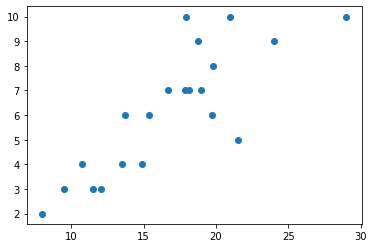

In [6]:
plt.scatter(dt.Delivery_Time,dt.Sorting_Time)

### Model 1

In [7]:
model1 = LinearRegression()

In [8]:
model1.fit(dt.Sorting_Time.values.reshape(-1,1),dt.Delivery_Time)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
pred1 = model1.predict(dt.Sorting_Time.values.reshape(-1,1))

In [10]:
pred1

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [11]:
model1.score(dt.Sorting_Time.values.reshape(-1,1),dt.Delivery_Time)

0.6822714748417231

In [12]:
rmse1 = np.sqrt(np.mean((pred1-dt.Delivery_Time)**2))

In [13]:
rmse1

2.791650327061766

In [14]:
model1.coef_

array([1.6490199])

In [15]:
model1.intercept_

6.58273397199706

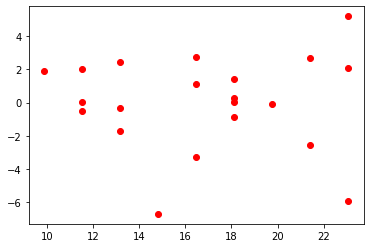

In [16]:
#### Residuals Vs Fitted values
plt.scatter(pred1,(pred1-dt.Delivery_Time),c="r")

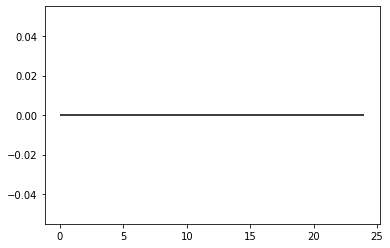

In [17]:
plt.hlines(y=0,xmin=0,xmax=24) 

In [18]:
### Fitting Quadratic Regression 
dt["Sorting_TIme_sqrd"] = dt.Sorting_Time*dt.Sorting_Time

### Model 2

In [19]:
model2 = LinearRegression()

In [20]:
model2.fit(X = dt.iloc[:,[0,2]],y=dt.Delivery_Time)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
pred2 = model2.predict(dt.iloc[:,[0,2]])

In [22]:
pred2

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [23]:
# Adjusted R-Squared value
model2.score(dt.iloc[:,[0,2]],dt.Delivery_Time)

1.0

In [24]:
rmse2 = np.sqrt(np.mean((pred2-dt.Delivery_Time)**2))

In [25]:
rmse2

1.9765474244486357e-15

In [26]:
model2.coef_

array([ 1.00000000e+00, -3.10125656e-17])

In [27]:
model2.intercept_

0.0

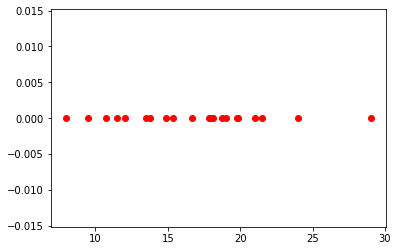

In [28]:
#### Residuals Vs Fitted values
plt.scatter(pred2,(pred2-dt.Delivery_Time),c="r")

(array([ 6.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0., 13.]),
 array([-3.55271368e-15, -3.19744231e-15, -2.84217094e-15, -2.48689958e-15,
        -2.13162821e-15, -1.77635684e-15, -1.42108547e-15, -1.06581410e-15,
        -7.10542736e-16, -3.55271368e-16,  0.00000000e+00]),
 <a list of 10 Patch objects>)

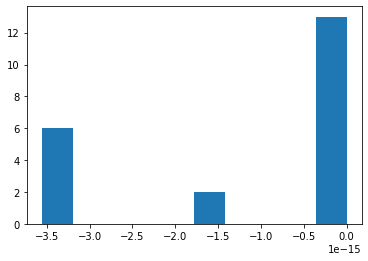

In [29]:
# Checking normal distribution
plt.hist(pred2-dt.Delivery_Time)

In [30]:
import pylab
import scipy.stats as st

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.55271368e-15, -3.55271368e-15, -3.55271368e-15, -3.55271368e-15,
         -3.55271368e-15, -3.55271368e-15, -1.77635684e-15, -1.77635684e-15,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00])),
 (1.409498114853118e-15, -1.1842378929335002e-15, 0.826582850218651))

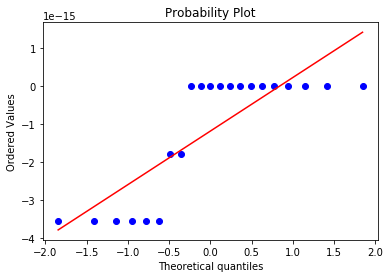

In [31]:
st.probplot(pred2-dt.Delivery_Time,dist="norm",plot=pylab)

In [32]:
# Let us prepare a model by applying transformation on dependent variable
dt["Delivery_Time_sqrt"] = np.sqrt(dt.Delivery_Time)

### Model 3

In [33]:
model3 = LinearRegression()
model3.fit(X = dt.iloc[:,[0,2]],y=dt.Delivery_Time_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
pred3 = model3.predict(dt.iloc[:,[0,2]])

In [35]:
pred3

array([4.57794699, 3.6446181 , 4.40881324, 4.9369935 , 5.54916435,
       3.87464369, 4.32129213, 3.15710837, 4.20160027, 4.29963211,
       4.42612962, 3.31076213, 4.0396391 , 3.39991271, 3.46425586,
       3.81215309, 3.68040022, 4.2132442 , 2.97364722, 4.1792516 ,
       4.61827967])

In [36]:
# Adjusted R-Squared value
model3.score(dt.iloc[:,[0,2]],dt.Delivery_Time_sqrt)

0.990697172825253

In [37]:
rmse3 = np.sqrt(np.mean(((pred3)**2-dt.Delivery_Time)**2))

In [38]:
rmse3

0.5103791623444999

In [39]:
model3.coef_

array([0.12140217, 0.00027158])

In [40]:
model3.intercept_

2.001343551533572

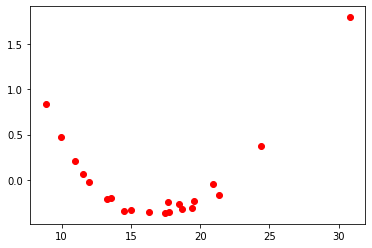

In [41]:
#### Residuals Vs Fitted values
plt.scatter((pred3)**2,((pred3)**2-dt.Delivery_Time),c="r")

(array([13.,  3.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.3638561 , -0.148148  ,  0.06756011,  0.28326821,  0.49897632,
         0.71468443,  0.93039253,  1.14610064,  1.36180875,  1.57751685,
         1.79322496]),
 <a list of 10 Patch objects>)

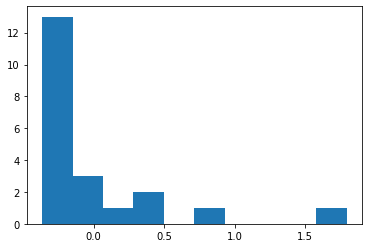

In [42]:
# checking normal distribution for residuals 
plt.hist((pred3)**2-dt.Delivery_Time)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-0.3638561 , -0.36131594, -0.35857329, -0.34748879, -0.33713627,
         -0.3264343 , -0.31236585, -0.26316369, -0.2465552 , -0.23937662,
         -0.2167589 , -0.20465423, -0.17149293, -0.04240134, -0.02893134,
          0.05940643,  0.21114591,  0.37390485,  0.46733326,  0.8425778 ,
          1.79322496])),
 (0.454383556307033, -0.003471979696133266, 0.8262406381340206))

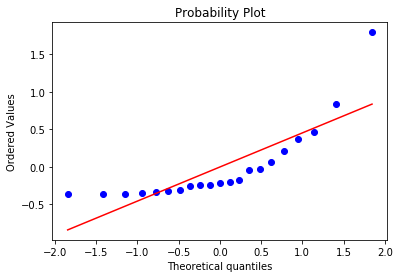

In [43]:
st.probplot((pred3)**2-dt.Delivery_Time,dist="norm",plot=pylab)

### Model 4

In [44]:
model4 = LinearRegression()

In [45]:
model4.fit(X = dt.Sorting_Time.values.reshape(-1,1),y=dt.Delivery_Time_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
pred4 = model4.predict(dt.Sorting_Time.values.reshape(-1,1))

In [47]:
pred4

array([4.83904922, 3.59925831, 4.01252195, 4.6324174 , 4.83904922,
       4.01252195, 4.21915377, 3.39262649, 4.83904922, 4.6324174 ,
       4.42578558, 3.59925831, 4.21915377, 3.39262649, 3.39262649,
       3.59925831, 4.01252195, 4.21915377, 3.18599468, 4.21915377,
       3.80589013])

In [48]:
# Adjusted R-Squared value
model4.score(dt.Sorting_Time.values.reshape(-1,1),dt.Delivery_Time_sqrt)

0.704049871541756

In [49]:
rmse4 = np.sqrt(np.mean(((pred4)**2-dt.Delivery_Time)**2))

In [50]:
rmse4

2.8494869914815193

In [51]:
model4.coef_

array([0.20663182])

In [52]:
model4.intercept_

2.7727310393450333

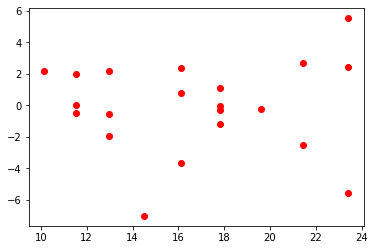

In [53]:
#### Residuals Vs Fitted values
plt.scatter((pred4)**2,((pred4)**2-dt.Delivery_Time),c="r")

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-7.01520032, -5.58360265, -3.64966762, -2.54070902, -1.92533961,
         -1.1987415 , -0.54533961, -0.52008548, -0.3087415 , -0.24242197,
         -0.0287415 ,  0.00991452,  0.75033238,  1.1212585 ,  2.00991452,
          2.15056207,  2.20466039,  2.35033238,  2.41639735,  2.70929098,
          5.51639735])),
 (2.9771918800907615, -0.11045382417325272, 0.970361366637152))

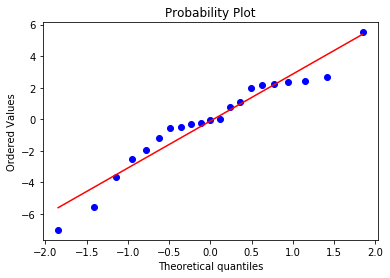

In [54]:
st.probplot((pred4)**2-dt.Delivery_Time,dist="norm",plot=pylab)

### Model 2 has better R-Squared value